In [35]:
import pandas as pd

import matplotlib.pyplot as plt
import time
import plotly.graph_objects as go


Data reading

In [36]:
def get_data():
    df = pd.read_csv('cars.csv',encoding='UTF-16',sep=',')
    print(df.head(10))  # Print the first 5 rows of the dataframe
    df.info()  # Get a concise summary of the dataframe
    df.describe()  # Generate descriptive statistics of the dataframe
    return df 

In [37]:
def data_manipulation(data):
    # Data Cleaning
    
    # Replace empty strings in the 'Status' column with '0'
    data['Status'] = data['Status'].replace('','0')
    
    # Remove duplicate rows from the DataFrame
    data = data.drop_duplicates()
    
    # For rows where 'Status' is 'New', fill missing values in the 'Mileage' column with 0
    data.loc[data['Status'] == 'New', 'Mileage'] = data.loc[data['Status'] == 'New', 'Mileage'].fillna(0)
    
    # Remove rows with any missing values
    data = data.dropna()
    
    # Check the number of missing values in each column
    data.isna().sum()
    return data

In [38]:
def save_to_file(df):
    # Storage
    df.to_csv('cleaned_data.csv')  # Save the cleaned data to a csv file
    df.to_json('cleaned_data.json')  # Save the cleaned data to a json file


In [39]:
def print_info(df):
    # Checking the categories of the categorical features:
    print("The categories in the variable 'Brand': ",end=" ")
    print(df['Brand'].unique())
    
    print("The categories in the variable 'Model': ",end=" ")
    print(df['Model'].unique())
    
    print("The categories in the variable 'Dealer': ",end=" ")
    print(df['Dealer'].unique())
    
    print("The categories in the variable 'Status': ",end=" ")
    print(df['Status'].unique())
    
    min_price = df['Price'].min()
    max_price = df['Price'].max()
    print("The minimum price of the car = {}".format(min_price))
    print("The maximum price of the car = {}".format(max_price))

In [40]:
def get_top_by_brands(df,top):
    # Create a new column 'Company_Model' in the DataFrame 'df' by combining 'Brand' and 'Model' columns
    df['Company_Model'] = df['Brand'] + " " + df['Model']
    
    # Group the DataFrame by 'Brand', then for each group, count the occurrences of each 'Company_Model'
    # Select the top 3 most frequent 'Company_Model' for each 'Brand'
    top3_models = df.groupby('Brand')['Company_Model'].apply(lambda x: x.value_counts().nlargest(top))
    
    # Display the 'top3_models' Series
    return top3_models

In [41]:
def get_count_by_years(df):
    # Group the DataFrame 'df' by 'Brand', 'Model', and 'Year'
    # For each group, calculate the size (number of rows)
    # This gives the number of occurrences of each combination of 'Brand', 'Model', and 'Year', which represents the popularity of each car model by year
    brand_popularity = df.groupby(['Brand','Model', 'Year']).size()
    
    # Display the 'brand_popularity' Series
    return brand_popularity


In [42]:
def get_top_dealers(df,top):
    # Filter the dataset to include only new cars
    new_cars_data = df[df['Status'] == 'New']
    
    # Find the top 5 dealers with the most new car sales
    top_dealers = new_cars_data['Dealer'].value_counts().nlargest(top).index
    
    # For each of the top 5 dealers
    for dealer in top_dealers:
        
        # Filter the new cars data to only include rows where the dealer is the current dealer
        df_dealer = new_cars_data[new_cars_data['Dealer'] == dealer]
        
        # Find the top 3 car models sold by the current dealer
        top3_cars = df_dealer['Company_Model'].value_counts().nlargest(3)
        
        # Plot the sales of the top 3 car models sold by the current dealer
        top3_cars.plot(kind='bar', title=f'Top {top} Cars Sold by {dealer}')
        plt.xlabel('Car')
        plt.ylabel('Number of Cars Sold')
        plt.savefig(f"images/top3_cars_by_{dealer}.png")
        plt.show()

In [43]:
def avg_price_by_year(df):
    avg_price_by_year = df.groupby(['Brand', 'Model', 'Year','Status'])['Price'].mean()
    return avg_price_by_year

In [44]:
def price_distribution(df):
    price_distribution = df.groupby('Status')['Price'].describe()
    return price_distribution

In [45]:
def avg_mileage_by_model(df):
    # 3. Mileage Analysis
    # Average mileage by brand and model
    avg_mileage = df.groupby(['Brand', 'Model'])['Mileage'].mean()
    return avg_mileage


In [46]:
def avg_price_by_dealer(df):
    avg_price_by_dealer = df.groupby('Dealer')['Price'].mean()
    return avg_price_by_dealer.head()

In [47]:
def budget_segments(df):
    # Presentation
    
    # Divide the 'Price' column into 3 quantiles and label them as 'Low', 'Medium', and 'High'
    budget_segments = pd.qcut(df['Price'], q=3, labels=['Low', 'Medium', 'High'])
    
    # Count the number of occurrences of each budget segment
    segment_counts = budget_segments.value_counts()
    
    # Plot the distribution of budget segments
    
    # Create a bar plot with budget segments on the x-axis and their counts on the y-axis
    plt.bar(segment_counts.index, segment_counts.values)
    
    # Label the x-axis as 'Budget Segment'
    plt.xlabel('Budget Segment')
    
    # Label the y-axis as 'Count'
    plt.ylabel('Count')
    
    # Set the title of the plot as 'Distribution of Budget Segments'
    plt.title('Distribution of Budget Segments')
    
    # Display the plot
    plt.savefig("images/distribution.png")
    plt.show()
    return segment_counts

In [48]:

def get_top20cars(df):
    # Group the DataFrame by 'Company_Model' and calculate the sum of 'Price' for each group
    filter = df.groupby(by=['Company_Model']).agg({'Price':'sum'})
    
    # Sort the grouped DataFrame by 'Price' in descending order and select the top 20
    car_style = filter.sort_values(by='Price', ascending=False).head(20)
    
    # Create a bar plot with 'Company_Model' on the x-axis and 'Price' on the y-axis
    fig = go.Figure(data=[
        go.Bar(x=car_style.index, y=car_style.Price)
    ])
    
    # Set the title of the plot and the labels of the x-axis and y-axis
    fig.update_layout(
        title='Top 20 Car Models and Total Price',
        xaxis_title='Models',
        yaxis_title='Price'
    )
    
    # Display the plot
    fig.show()

    return car_style

In [49]:
def get_total_sales_by_year(df,year):
    df_year = df[df['Year'] == year]
    # Get unique brands
    brands = df_year['Brand'].unique()
    
    # For each brand, group by 'Status' and calculate sum of 'Price'
    for brand in brands:
        df_brand = df_year[df_year['Brand'] == brand]
        sales_by_status = df_brand.groupby('Status')['Price'].sum()
        
        # Create bar plot
        sales_by_status.plot(kind='bar', title=f'{brand} sales of cars produced in {year}')
        plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
        plt.xlabel('Status')
        plt.ylabel('Total Sales')
        plt.savefig(f"images/{brand}-{year}.png")
        plt.show()
        
        time.sleep(1)  # Wait for 1 second
        # clear_output(wait=False)  # Clear output


In [50]:
def run():
    data = data_manipulation(get_data())
    save_to_file(data)
    print_info(data)
    get_top_by_brands(data,top=3)
    get_count_by_years(data)
    get_top_dealers(data,top=5)
    avg_price_by_year(data)
    price_distribution(data)
    avg_mileage_by_model(data)
    avg_price_by_dealer(data)
    budget_segments(data)
    get_top20cars(data)
    get_total_sales_by_year(data,year=2022)
    

        Brand     Model  Year     Status  Mileage  \
0       Mazda      CX-5  2023        New      NaN   
1         Kia  Sportage  2023        New      NaN   
2   Chevrolet    Camaro  2024        New      NaN   
3        Ford    Bronco  2023       Used   1551.0   
4       Acura       TLX  2021       Used  30384.0   
5  Volkswagen      Golf  2022  Certified  13895.0   
6         GMC     Yukon  2021       Used  68506.0   
7         BMW      M340  2023        New      NaN   
8     Hyundai    Sonata  2023        New      NaN   
9     Hyundai    Sonata  2023        New      NaN   

                               Dealer    Price  
0                                 NaN  36703.0  
1                         Classic Kia  28990.0  
2          Classic Chevrolet Beaumont  41425.0  
3  Mike Smith Chrysler Dodge Jeep RAM  58900.0  
4                   Mike Smith Nissan  34499.0  
5              Volkswagen of Beaumont  34000.0  
6                     BMW of Beaumont  56954.0  
7                     BM

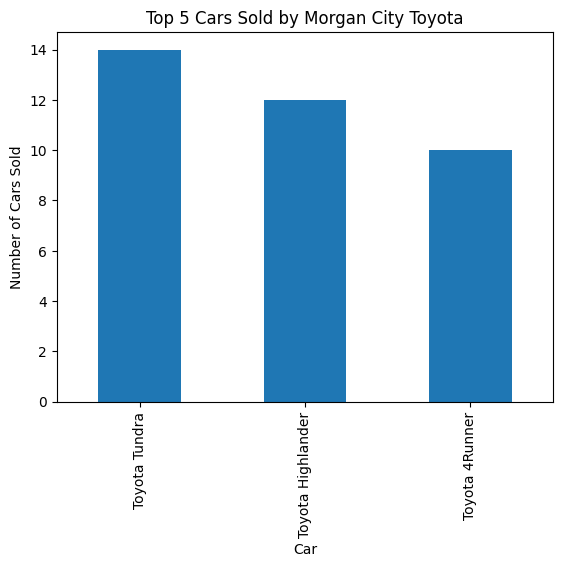

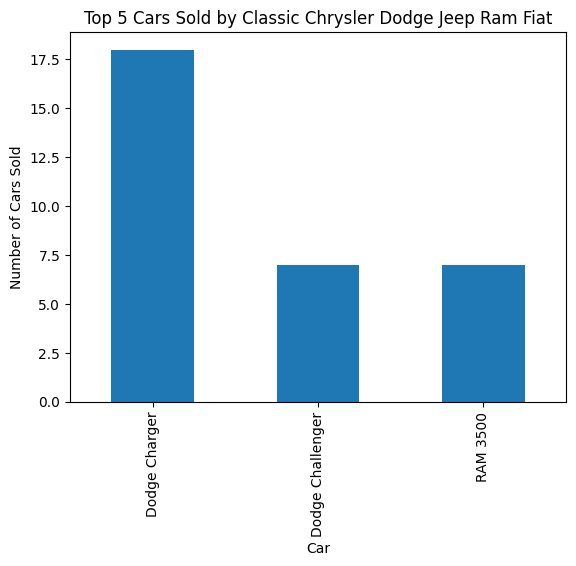

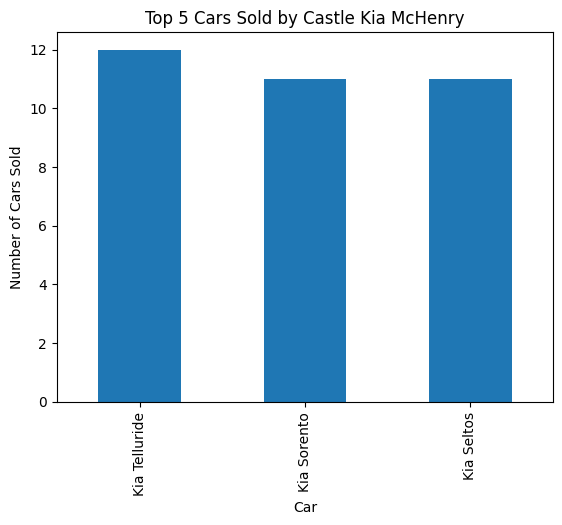

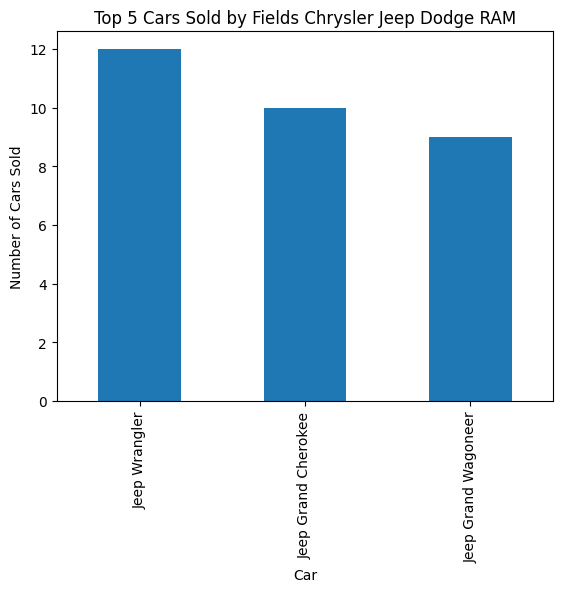

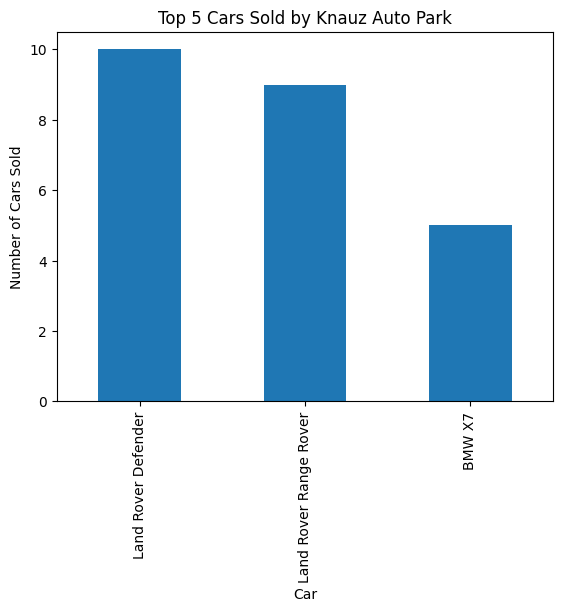

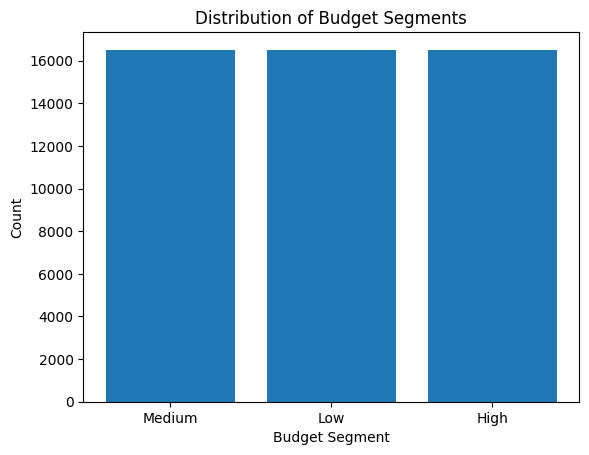

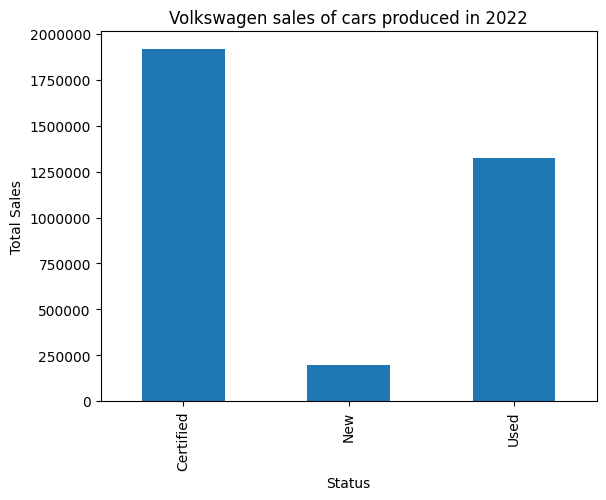

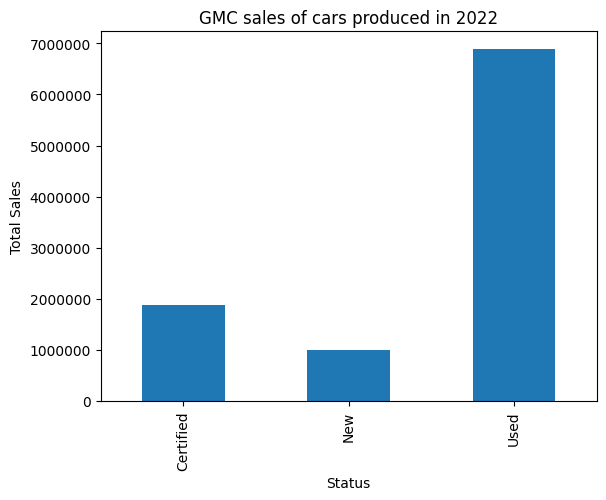

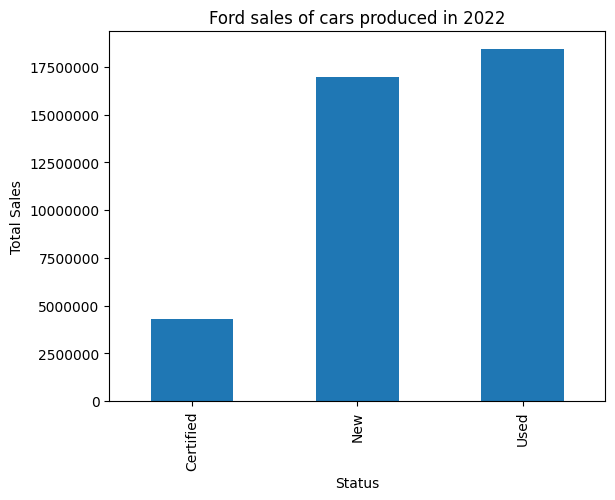

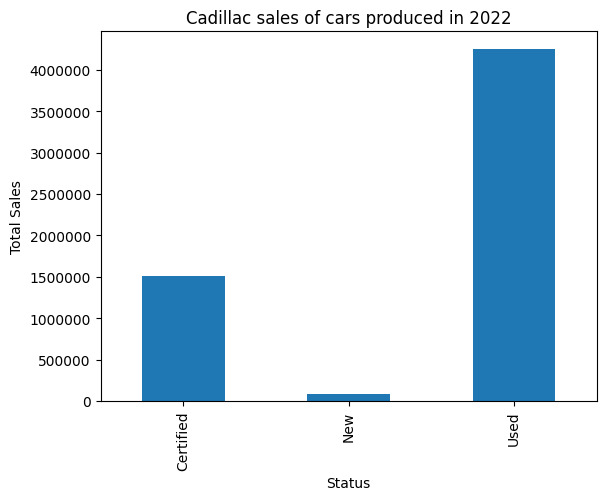

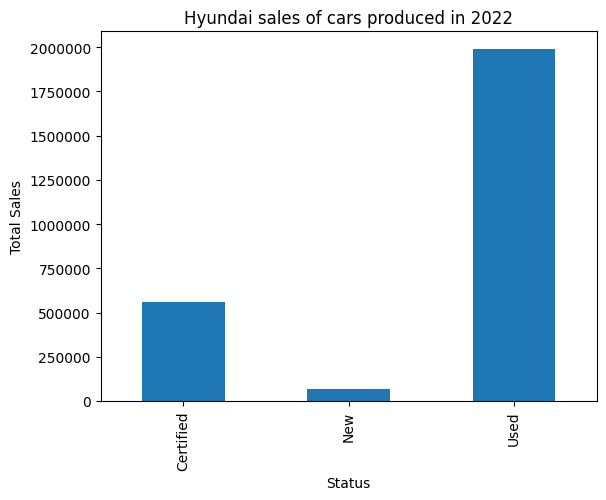

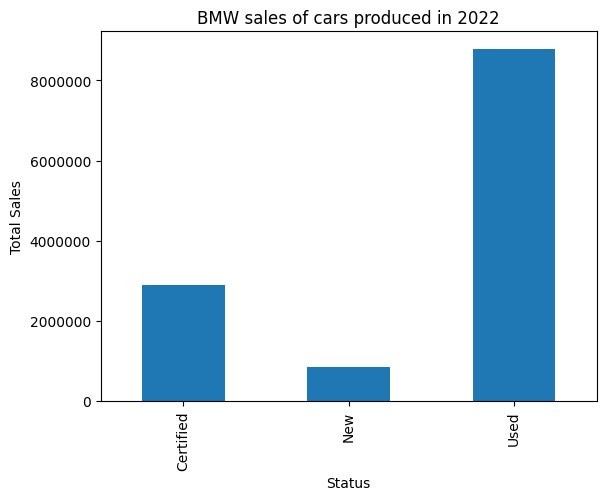

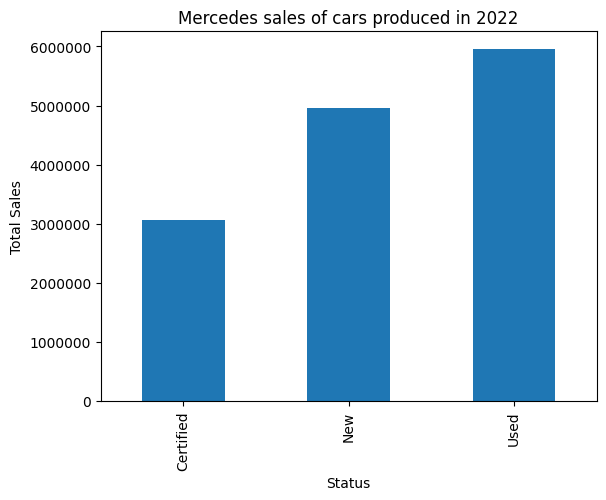

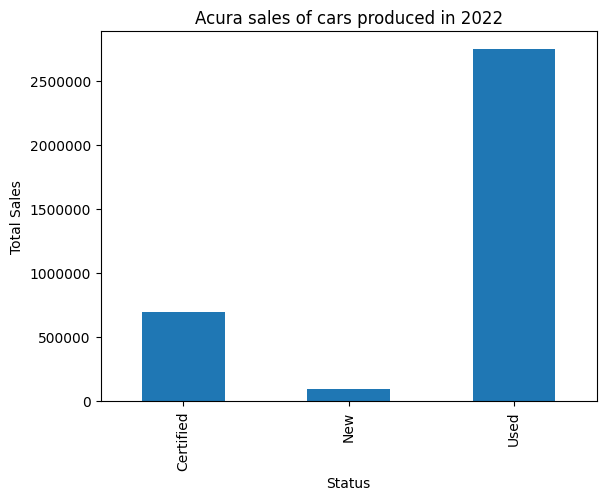

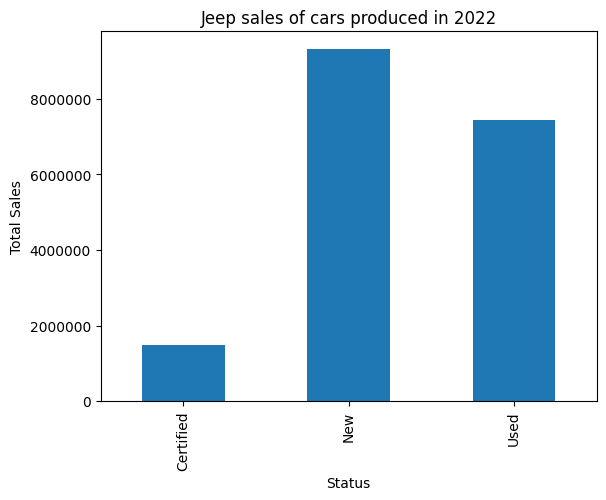

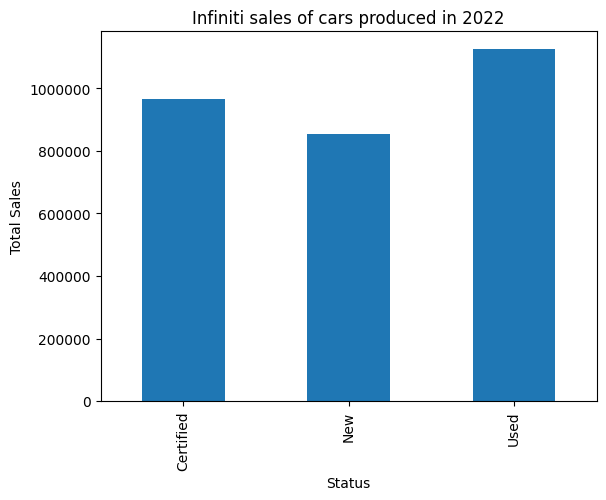

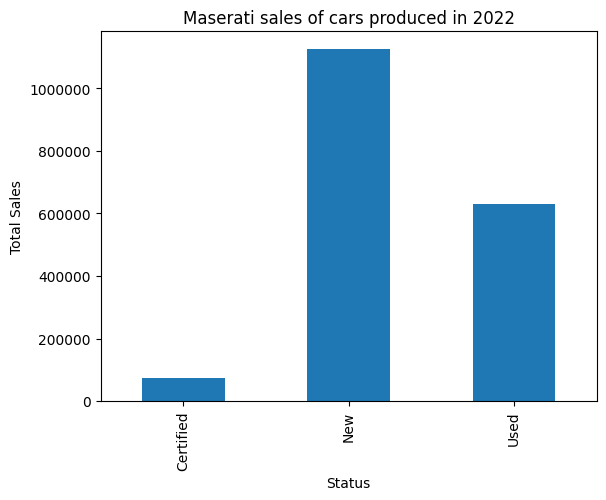

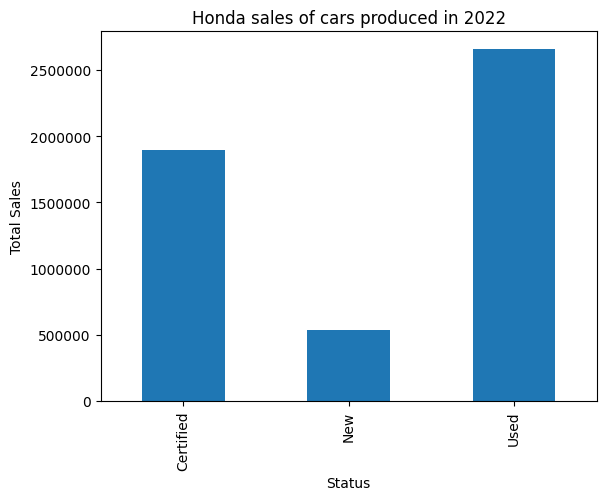

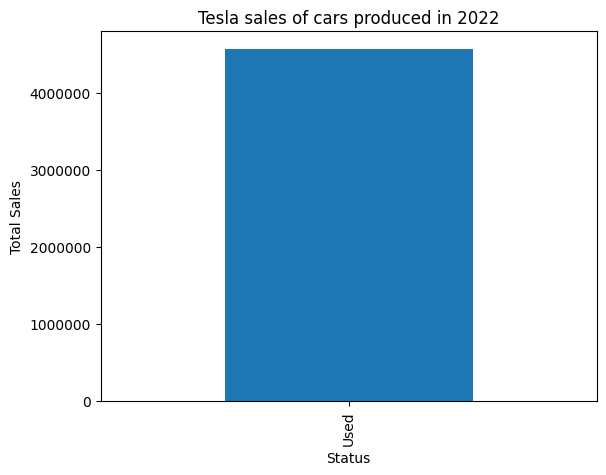

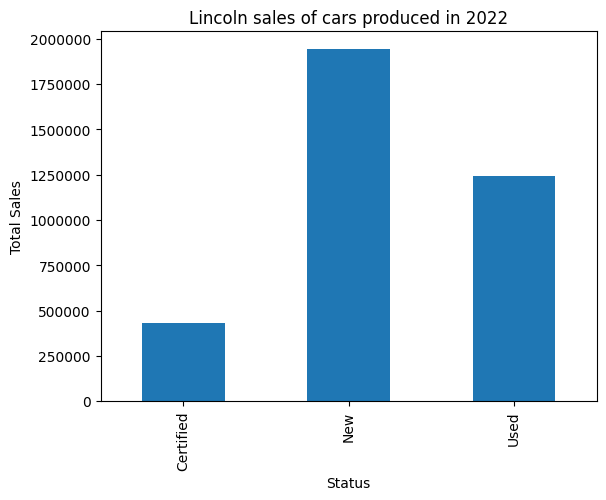

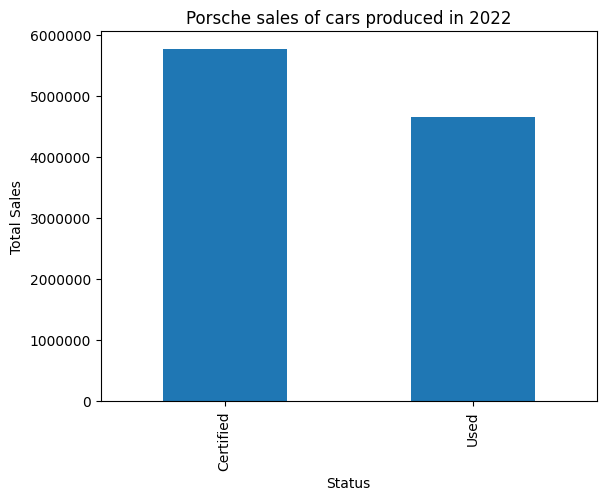

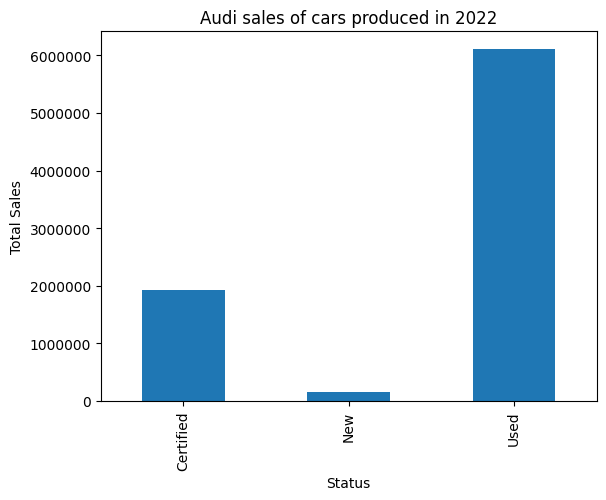

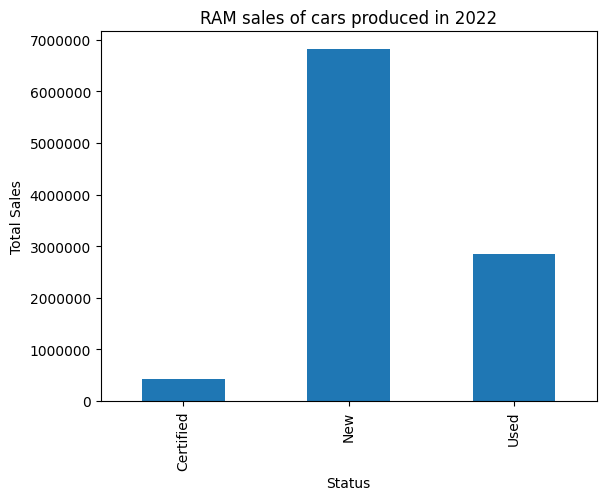

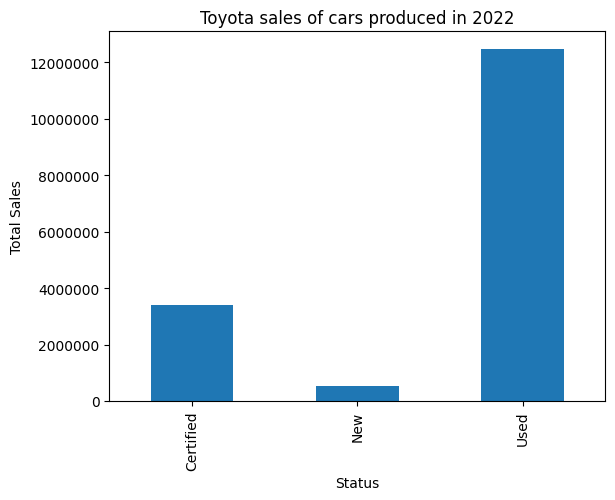

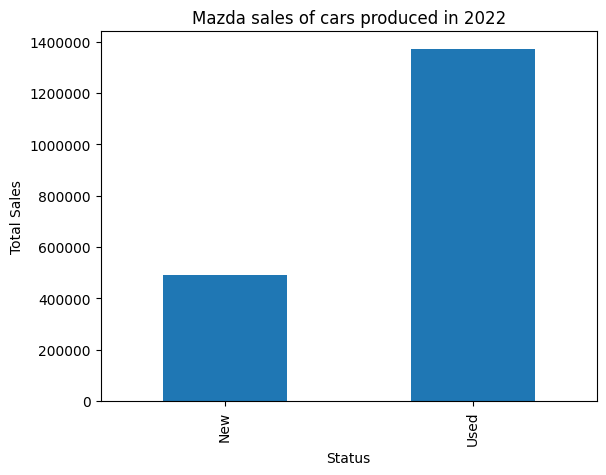

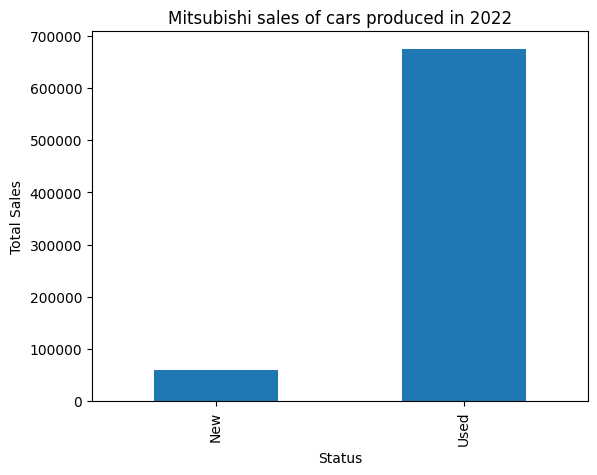

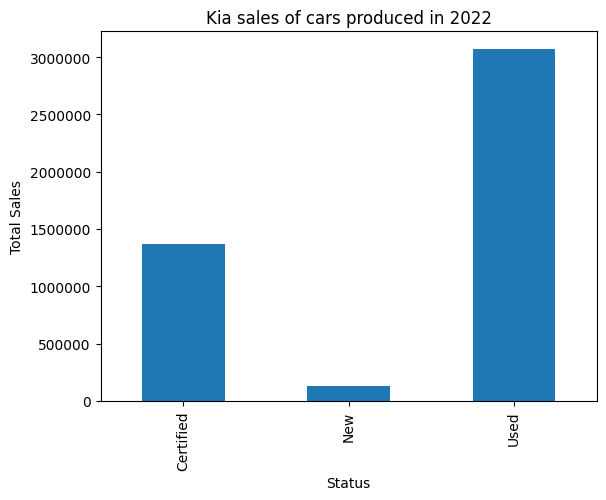

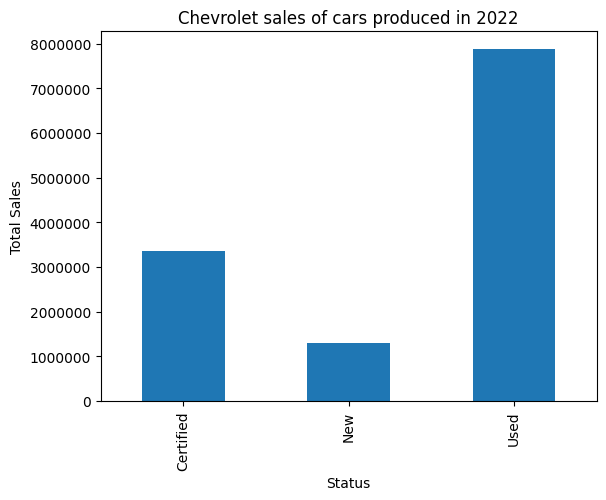

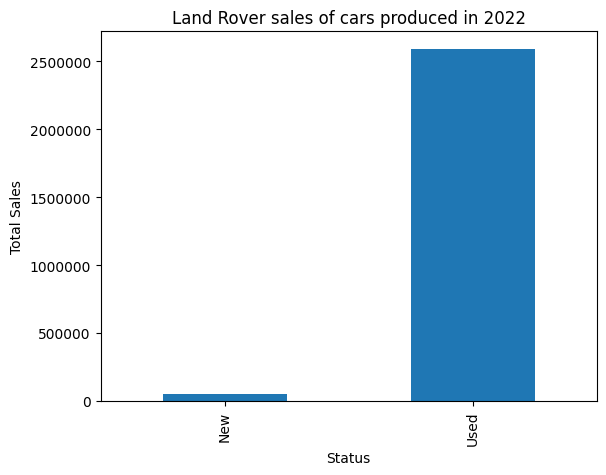

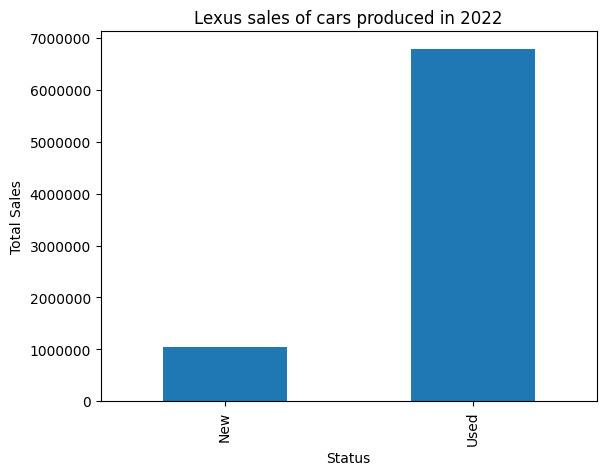

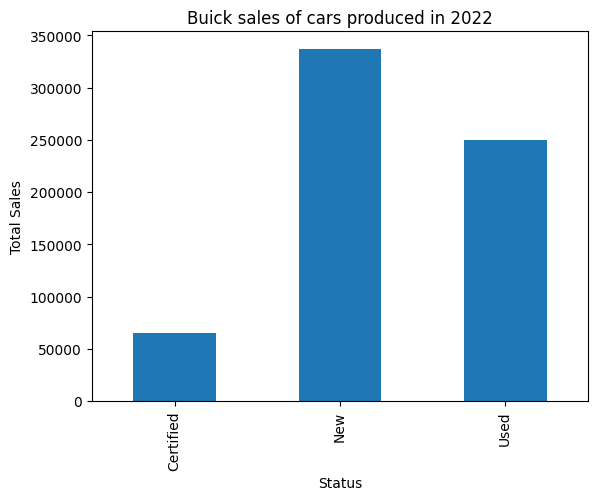

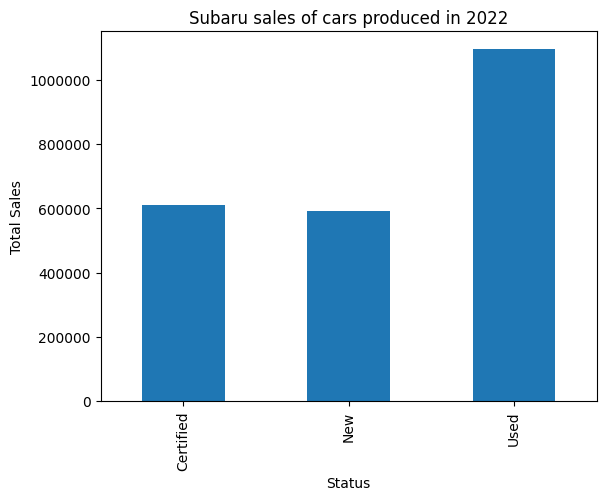

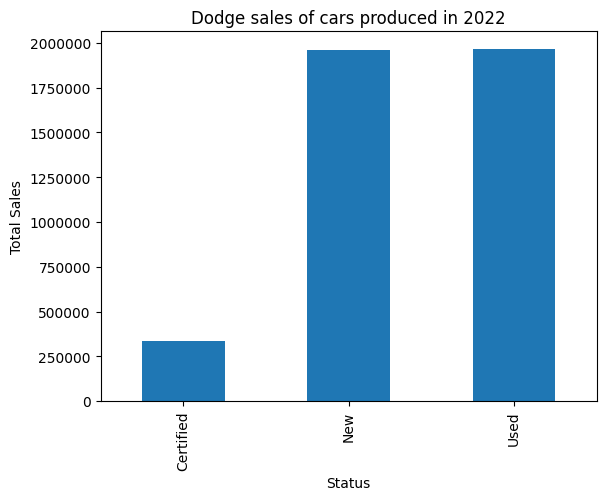

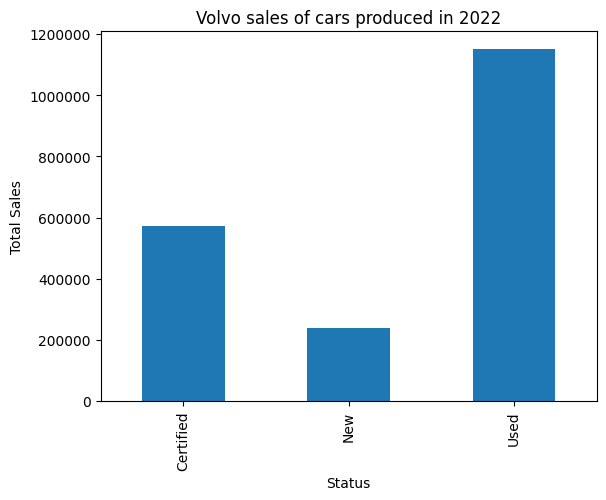

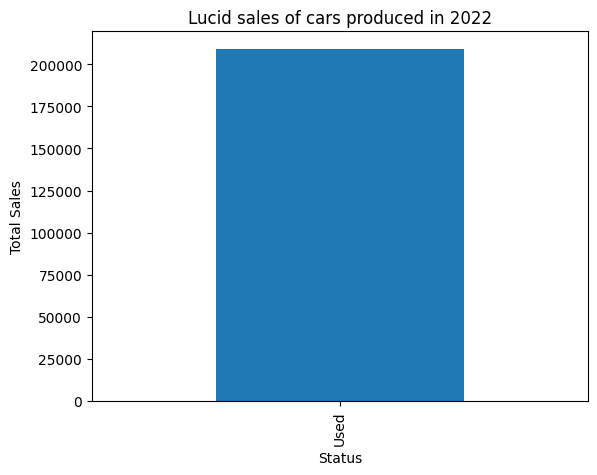

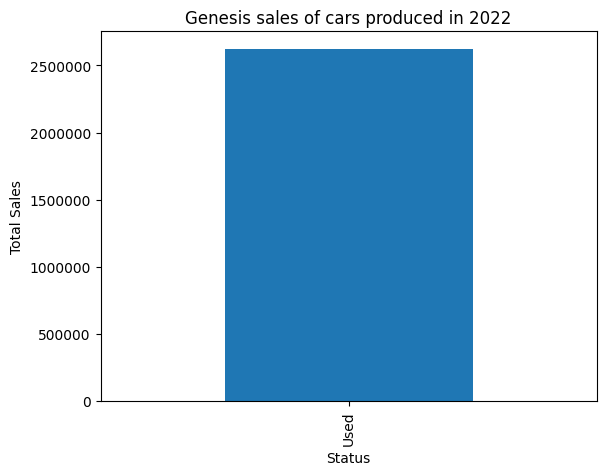

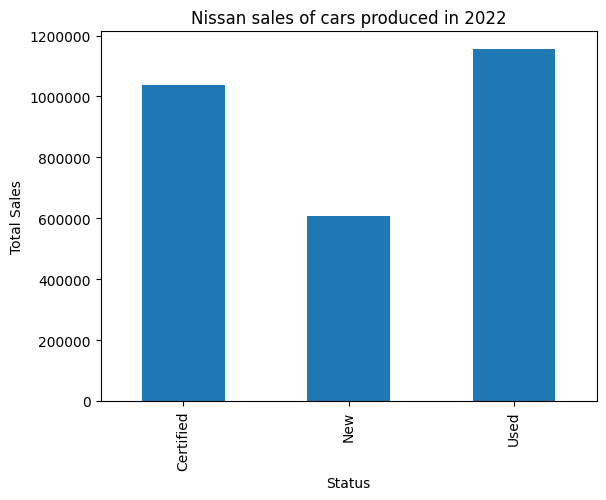

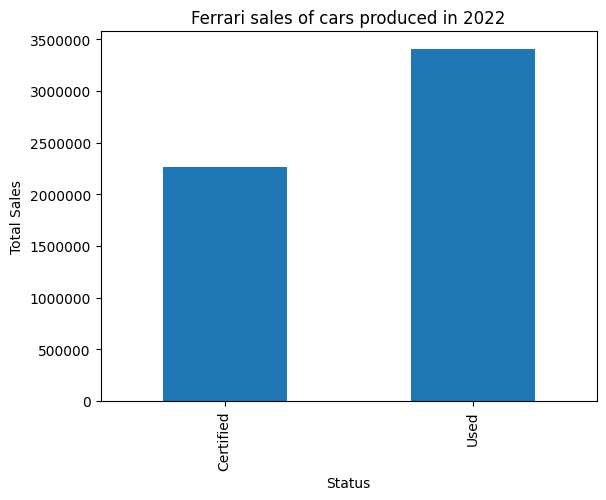

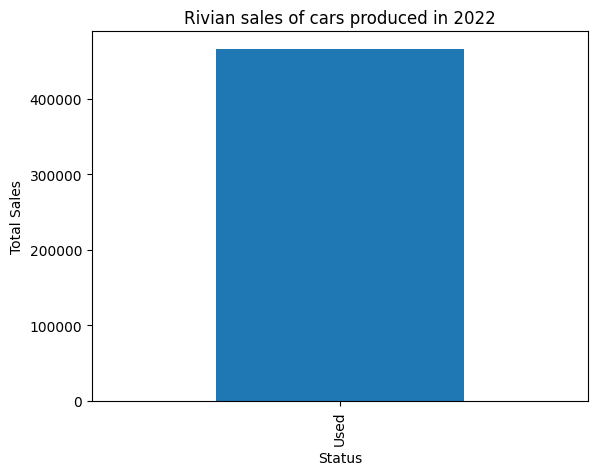

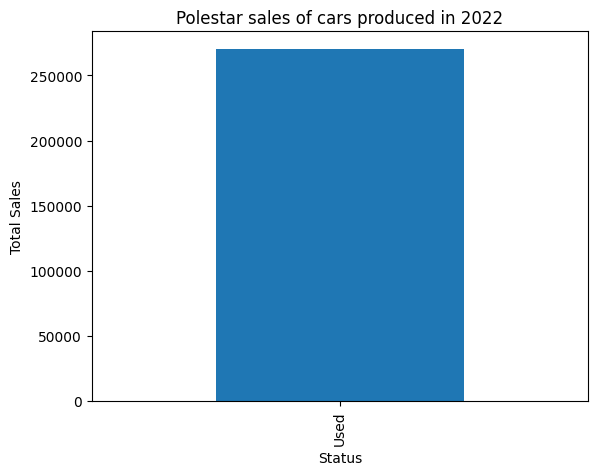

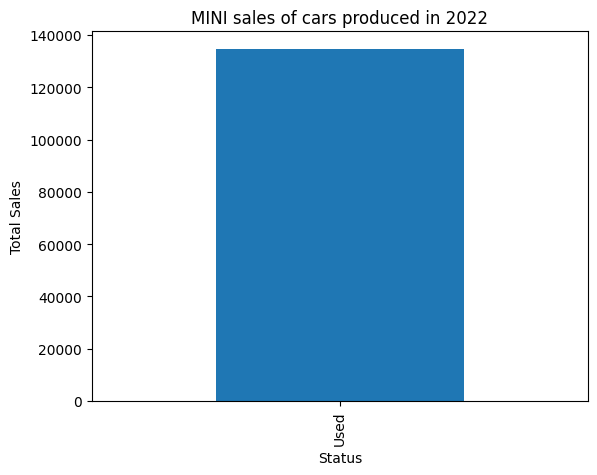

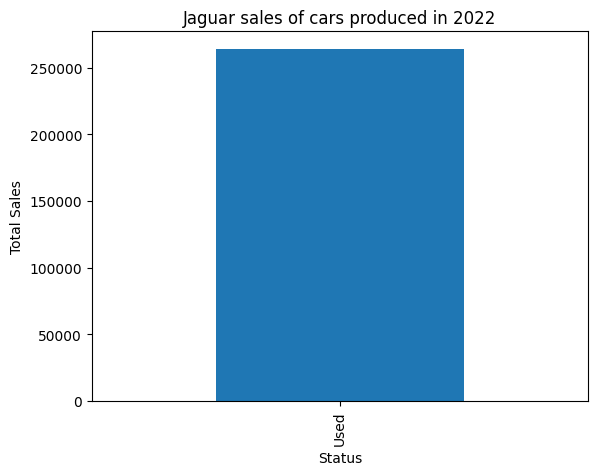

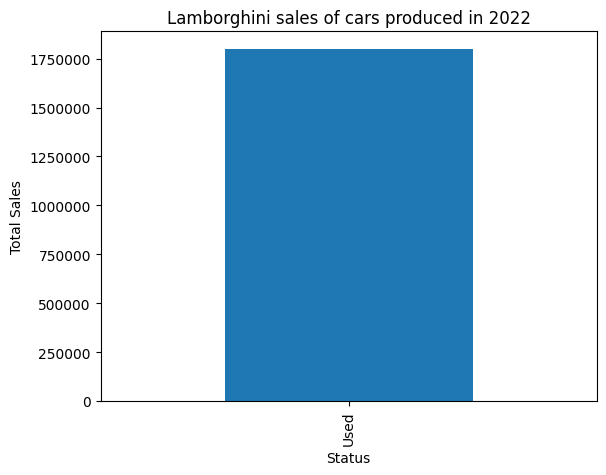

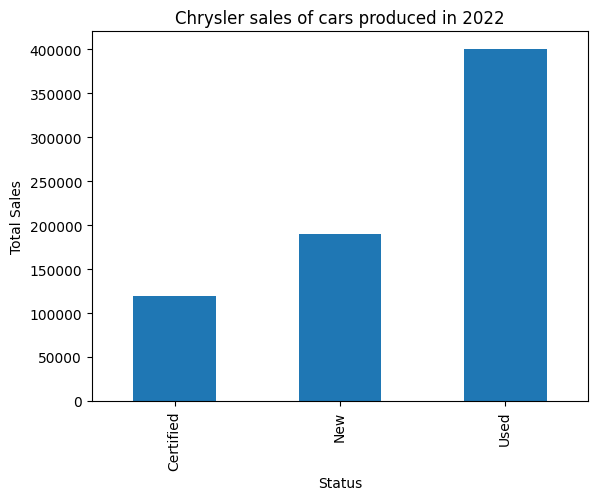

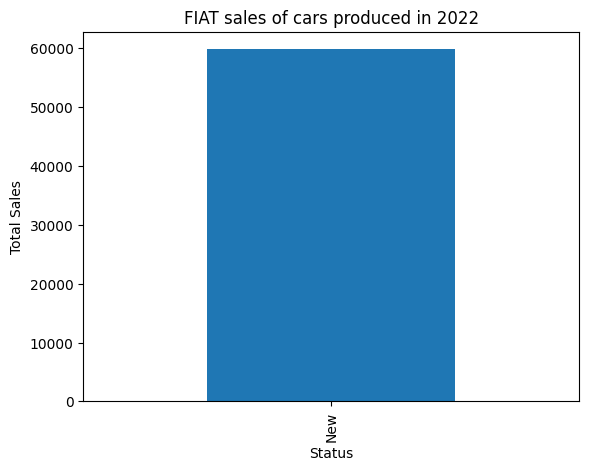

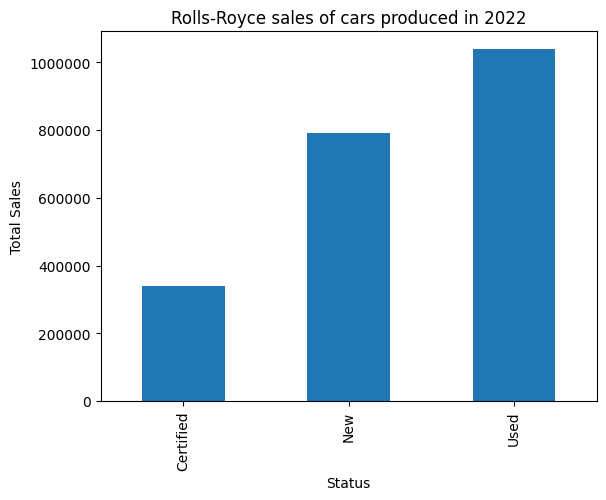

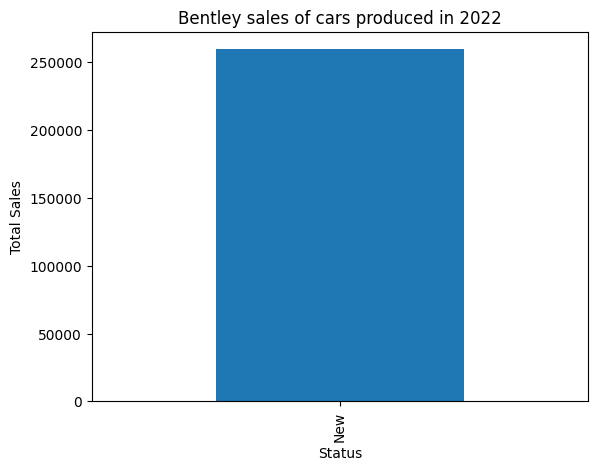

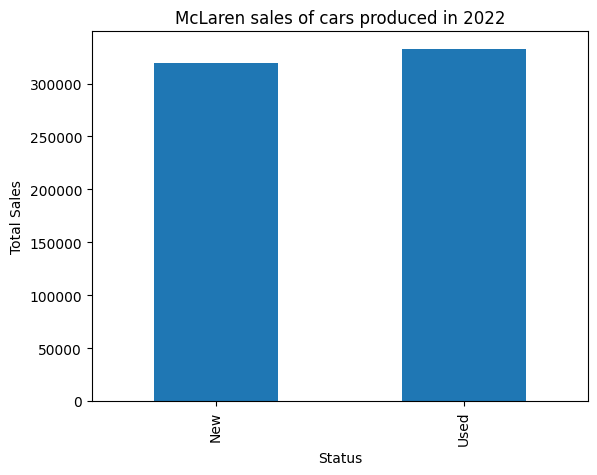

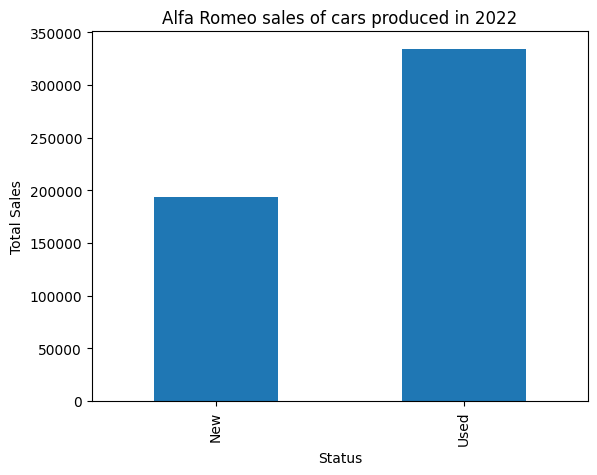

In [51]:
run()